# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 9  AC 209 : Convolutional Neural Networks


**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">


In [1]:
# RUN THIS CELL FOR FORMAT
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

%matplotlib inline

<div class='exercise'> <b>  Question 3 [12 pts] </b> </div>

**3.1** What is the motivation for convolutional layers in image analysis?.

**3.2** Let $C$ be a CNN with the following layers:
1. Input layer, 64x64x3 RGB image
2. Convolutional Layer, 16 3x3 filters, stride 1, padding = same, activation = relu
3. Convolutional layer, 32 5x5 filters, stride 1, padding = same, activation = relu
4. Maxpool layer, size 3x3, stride 2
5. Convolutional layer, 128 3x3 filters, stride 1, padding = same
6. Fully connected layer, 5 outputs

a) Without doing any calculations, which layer will have the most parameters? 

b) How many parameters does this CNN have in total? Show the number of parameters of each layer.


<div class='exercise'> <b>  Question 4 [13 pts]</b> </div>


We will now compare a Fully Connected Network (Multi-Layer Perceptron) and a simple CNN on the task of image classification. We'll use a well known open dataset: CIFAR10. We will be using Keras for our networks.

CIFAR10 is a classic dataset released by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton (Machine learning legends). It consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. 

Here are some examples of the images in the dataset:

<img style="width:500px; height:400px" src="http://clouddatafacts.com/_images/cifar_10.png">


Good news: Keras allows us to easily imports well-known datasets like CIFAR10. We'll import the CIFAR10 dataset with `keras.datasets.cifar10.load_data()`. This will return two tuples of numpy arrays: `(x_train, y_train), (x_test, y_test)`. 

After that, we will implement an MLP and a CNN to classify the 10 classes of CIFAR10. 

Keras can build models in two different ways: *Sequential* and *Functional*. 

The Sequential API is a good starting point, as it allows you to easily create models layer by layer. You used it during the 109 part of the homework. Building a Sequential model just requires to instantiate a `Sequential()` object with `model = Sequential()`, and adding layers after that is easily done with `model.add(layer)`. This API has several limitations, as it does not allow you to easily create bypass connections, share layers between models or have multiple inputs or outputs.

Small example of the Sequential API:
```
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim=1))
model.add(Dense(1))
```

The functional API allows you to create models that have a lot more flexibility as you can easily define models where layers connect to more than just the previous and next layers. You can connect layers to any other layer, add more inputs to your network (even in the middle of it) and concatenating outputs easily. Creating complex networks, such as ResNets, becomes feasible.

Small example of the Functional API:
```
# We define an Input layer
inp = Input(shape=(64,64,3))

# We instantiate a Dense layer and connect it to the previous layer with (inp)
x = Dense(10)(inp)

# We repeat the process, connecting here with (x)
x= Dense(10)(x)

out = Dense(1)(x)

# We build the full model
model = Model(inputs=in, outputs=out)
```

We will be using the Functional API for this problem, as this is the main mode that you will be using should you decide to build a serious network. 

**4.1** Import the CIFAR10 dataset, one-hot encode the labels and put your x_train and x_test into the [0,1] range. Plot some train and test images to get a better feel for the data.
Hints:
1. Keras has a very convenient function for converting labels to categorical: `keras.utils.np_utils.to_categorical()`.
2. Your `x_train` and `x_test` will come as 8-bit images, so numpy array of integers with values from 0 to 255.
3. `plt.imshow` is your friend.

**4.2** Using the functional API, build two networks:

(a) MLP with the following layers:
1. Input layer
2. Flatten layer (so that we can feed easily to Dense layers afterwards)
3. Dense layer, 128 nodes, relu activation
3. Dropout layer, 0.2 probability
4. Dense layer, 256 nodes, relu activation
3. Dropout layer, 0.2 probability
5. Dense layer, 512 nodes, relu activation
3. Dropout layer, 0.2 probability
6. Dense layer, 10 nodes, softmax activation

(b) CNN with the following layers:
1. Conv2D, 32 3x3 filters, (1,1) strides, padding=same, activation=relu, use_bias=True
2. Conv2D, 32 3x3 filters, (1,1) strides, padding=same, activation=relu, use_bias=True
3. Maxpool, strides (2,2), pool_size (2,2)
1. Conv2D, 64 3x3 filters, (1,1) strides, padding=same, activation=relu, use_bias=True
2. Conv2D, 64 3x3 filters, (1,1) strides, padding=same, activation=relu, use_bias=True
3. Maxpool, strides (2,2), pool_size (2,2)
1. Conv2D, 128 3x3 filters, (1,1) strides, padding=same, activation=relu, use_bias=True
2. Conv2D, 128 3x3 filters, (1,1) strides, padding=same, activation=relu, use_bias=True
3. Maxpool, strides (2,2), pool_size (2,2)
5. Flatten layer
6. Dropout layer, 0.2 probability
7. Dense layer, 512 nodes, relu activation
8. Dropout, 0.5 probability
9. Dense layer, 10 nodes, softmax activation


Some extra help: here are the definitions of generic Conv2D layers, MaxPooling2D layers, Dense, Flatten and Dropout layers:


```
x = Conv2D(32, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
```

Use model.summary() to report the number of parameters on each model.
Train both models on CIFAR10 with a batch size of 32 for 5 epochs and report the result.

Some helpful tips:
1. Once you've defined your layers and connected them to each other, remember to use `model = Model(inputs=inp, output=out)` to build the full model.
2. Once you have the model, you will need to define an optimizer (SGD, Adam, etc), define a loss (use categorical_crossentropy), indicate which metrics to use, and send those parameters to the compile function before fitting it. Your code should look like this:

```
optimizer = YourOptimizer(lr=yourLearningRate)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=yourBatchSize, epochs = yourEpochs, validation_split=0.2)
```

A note about `validation_split`: If set to 0.2, the fit function automatically sets apart 20% of your training data and doesn't train on it. It will use that 20% to give indications on how the model is doing by showing a val_acc value at the end of each epoch. You could also extract a validation dataset yourself and send it to the function with `validation_data`. 

### Answers

<div class='exercise'> <b>  Question 7 </b> </div>



**7.1** What is the motivation for convolutional layers in image analysis?.


*your answer here*

Convolutional layers take advantage of the semantic significance of neighboring pixels to greatly reduce the number of parameters needed in a neural network for image analysis. The main idea of convolutional layers is to use filters that slide through the image, responding to particular characteristics of the image irrespective of their position. With this technique, we are able to detect a given feature in any position in the image, whereas an MLP would need to separately learn to recognize that feature on the top right, bottom left, center, etc.


**7.2** Let $C$ be a CNN with the following layers:
1. Input layer, 64x64x3 RGB image
2. Convolutional Layer, 16 3x3 filters, stride 1, padding = same, activation = relu
3. Convolutional layer, 32 5x5 filters, stride 1, padding = same, activation = relu
4. Maxpool layer, size 3x3, stride 2
5. Convolutional layer, 128 3x3 filters, stride 1, padding = same
6. Flatten layer
7. Fully connected layer, 5 outputs

a) Without doing any calculations, which layer will have the most parameters?
b) How many parameters does this CNN have in total? Show the number of parameters of each layer.


*your answer here*

a) The fully connected layer has the most parameters. Remember that one of the properties of convolutional layers is that they have a reduced amount of parameters when comapred to a fully connected layer that does the same job. The fully connected layer, however, is connected to every single neuron of the previous convolutional layer's output, and there are WxHxFilters neurons in that layer's output (in this case, 128 filters, so we can definitely see that the fully connected layer is going to have a huge amount of connections). In a lot of cases, the part with the highest amount of parameters in a CNN is always the output block, which is composed of one or more fully connected layers.

b) Params per layer:
1. 0 params
2. 16x3x3x3 + 16 = 448 params
3. 32x5x5x16 + 32 = 12832 params
4. 0 params, just reduces width and height (important for fully connected!)
5. 128x3x3x32 + 128 = 36992 params
6. 0 params
7. (32x32x128) x 5 + 5 = 655365 params

Total: 705637

<div class='exercise'> <b>  Question 8 </b> </div>


In [1]:
# Imports
import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Input, Flatten, Dropout, UpSampling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import cifar10

Using TensorFlow backend.


**8.1** Import the CIFAR10 dataset, one-hot encode the labels and put your x_train and x_test into the [0,1] range. Plot some train and test images to get a better feel for the data.
Hints:
1. Keras has a very convenient function for converting labels to categorical: keras.utils.np_utils.to_categorical()
2. Your x_train and x_test will come as 8-bit images, so numpy array of integers with values from 0 to 255.
3. plt.imshow() is your friend.

*your answer here*


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
x_train = x_train/255
x_test = x_test/255
# print(y_train.shape, y_test.shape)
# print(x_train[:10])

Text(0.5,0.98,'Testing images')

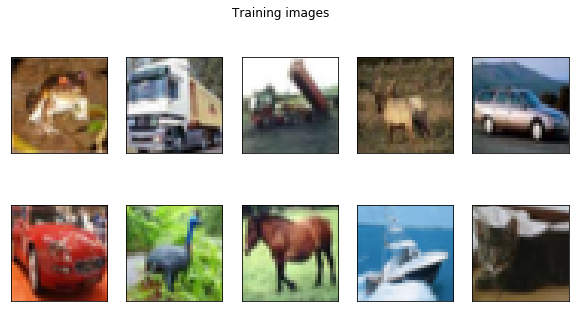

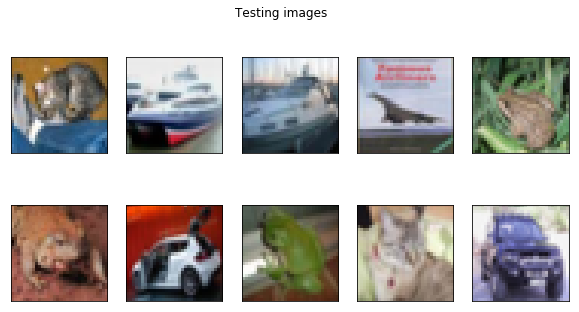

In [11]:
plt.figure(figsize=[10,5])
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
plt.suptitle('Training images')
    
plt.figure(figsize=[10,5])
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i])
plt.suptitle('Testing images')

**8.2** Using the functional API, build two networks:
(a) MLP with the following layers:
1. Input layer
2. Flatten layer (so that we can feed easily to Dense layers afterwards)
3. Dense layer, 512 nodes, relu activation
3. Dropout layer, 0.2 probability
4. Dense layer, 512 nodes, relu activation
3. Dropout layer, 0.2 probability
5. Dense layer, 256 nodes, relu activation
3. Dropout layer, 0.2 probability
5. Dense layer, 128 nodes, relu activation
3. Dropout layer, 0.2 probability
6. Dense layer, 10 nodes, softmax activation

(b) CNN with the following layers:
1. Conv2D, 32 3x3 filters, (1,1) strides, padding=same, activation=relu, use_bias=True
2. Conv2D, 32 3x3 filters, (1,1) strides, padding=same, activation=relu, use_bias=True
3. Maxpool, strides (2,2), pool_size (2,2)
1. Conv2D, 64 3x3 filters, (1,1) strides, padding=same, activation=relu, use_bias=True
2. Conv2D, 64 3x3 filters, (1,1) strides, padding=same, activation=relu, use_bias=True
3. Maxpool, strides (2,2), pool_size (2,2)
1. Conv2D, 128 3x3 filters, (1,1) strides, padding=same, activation=relu, use_bias=True
2. Conv2D, 128 3x3 filters, (1,1) strides, padding=same, activation=relu, use_bias=True
3. Maxpool, strides (2,2), pool_size (2,2)
5. Flatten layer
6. Dropout layer, 0.2 probability
7. Dense layer, 512 nodes, relu activation
8. Dropout, 0.5 probability
9. Dense layer, 10 nodes, softmax activation


Some extra help: here are the definitions of generic Conv2D layers, MaxPooling2D layers, Dense, Flatten and Dropout layers:


```
x = Conv2D(32, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
```

Use model.summary() to report the number of parameters on each model.
Train both models on CIFAR10 with a batch size of 32 for 10 epochs and report the result.

Some helpful tips:
1. Once you've defined your layers and connected them to each other, remember to use model = Model(inputs=inp, output=out) to build the full model.
2. You can evaluate your model in keras with model.evaluate(x_test,y_test). This function returns your loss and metrics.
3. Once you have the model, you will need to define an optimizer (SGD, Adam, etc), define a loss (use categorical_crossentropy), indicate which metrics to use, and send those parameters to the compile function before fitting it. Your code should look like this:

```
model = Model(inputs=inp, output=out)
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_split=0.2)
```

A note about `validation_split`: If set to 0.2, the fit function automatically sets apart 20% of your training data and doesn't train on it. It will use that 20% to give indications on how the model is doing by showing a val_acc value at the end of each epoch. You could also extract a validation dataset yourself and send it to the function with `validation_data`. 

*your answer here*


In [33]:
# MLP network

inp = Input(shape = (32,32,3))
x = Flatten()(inp)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=inp, outputs= x)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_67 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_59 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_60 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 256)               131328    
__________

In [34]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs = 10, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 15s 373us/step - loss: 2.0434 - acc: 0.2335 - val_loss: 1.8719 - val_acc: 0.3146
Epoch 2/10
40000/40000 [==============================] - 13s 335us/step - loss: 1.9255 - acc: 0.2871 - val_loss: 1.8434 - val_acc: 0.3361
Epoch 3/10
40000/40000 [==============================] - 13s 334us/step - loss: 1.8918 - acc: 0.3030 - val_loss: 1.8361 - val_acc: 0.3297
Epoch 4/10
40000/40000 [==============================] - 13s 333us/step - loss: 1.8658 - acc: 0.3164 - val_loss: 1.8214 - val_acc: 0.3448
Epoch 5/10
40000/40000 [==============================] - 13s 335us/step - loss: 1.8460 - acc: 0.3256 - val_loss: 1.8075 - val_acc: 0.3498
Epoch 6/10
40000/40000 [==============================] - 13s 333us/step - loss: 1.8371 - acc: 0.3280 - val_loss: 1.8035 - val_acc: 0.3356
Epoch 7/10
40000/40000 [==============================] - 13s 334us/step - loss: 1.8145 - acc: 0.3358 - val_loss: 1.

In [35]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 140us/step


[1.701607027053833, 0.389]

In [36]:
# CNN network

inp = Input(shape = (32,32,3))

x = Conv2D(32, (5,5), strides=(1, 1), padding='same', activation='relu', use_bias=True)(inp)
x = Conv2D(32, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
x = Conv2D(64, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
x = Conv2D(64, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
x = Conv2D(128, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
x = Conv2D(128, (3,3), strides=(1, 1), padding='same', activation='relu', use_bias=True)(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same', data_format=None)(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(10, activation='softmax')(x)

model = Model(inputs=inp, outputs= x)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 64)          0         
__________

In [38]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs = 10, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 23s 574us/step - loss: 1.7772 - acc: 0.3433 - val_loss: 1.5517 - val_acc: 0.4419
Epoch 2/10
40000/40000 [==============================] - 21s 532us/step - loss: 1.4520 - acc: 0.4709 - val_loss: 1.3123 - val_acc: 0.5339
Epoch 3/10
40000/40000 [==============================] - 21s 534us/step - loss: 1.3073 - acc: 0.5284 - val_loss: 1.2452 - val_acc: 0.5537
Epoch 4/10
40000/40000 [==============================] - 21s 535us/step - loss: 1.1929 - acc: 0.5748 - val_loss: 1.0990 - val_acc: 0.6109
Epoch 5/10
40000/40000 [==============================] - 21s 530us/step - loss: 1.0954 - acc: 0.6101 - val_loss: 1.0156 - val_acc: 0.6411
Epoch 6/10
40000/40000 [==============================] - 21s 530us/step - loss: 1.0204 - acc: 0.6413 - val_loss: 0.9765 - val_acc: 0.6568
Epoch 7/10
40000/40000 [==============================] - 21s 531us/step - loss: 0.9548 - acc: 0.6646 - val_loss: 0.

In [39]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 162us/step


[0.8121622955322265, 0.7162]

**8.3** Comment on the result. Which model has more parameters? Which model performs better? What can you say about what you observed?

*your answer here*


Clearly, the CNN performs much better: in 10 epochs, it gets to much higher accuracy than the MLP, and with fewer parameters! This shows the superiority of convolutional layers over blindly connecting every cell with every other one. Convolutional layers are more adapted for iamge analysis, as they use filters to analyze the entire image in a sliding fashion and search for particular features.